In [2]:
import requests
import json
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',None)

# Importanto os dados

In [4]:
def importing_data(diretorio, printar=False):

    df_all = pd.read_csv(diretorio, index_col='id')
    df_all.drop(columns='Unnamed: 0',axis=1, inplace= True)

    # alteração, não faz parte do projeto inicial
    df_new_cards = df_all.drop(columns=['In % of Decks', 'Deck win rate', 'Unique Deck WR', 'Vendidos por semana', 'Variação do preço %', 'Tendencia'], axis=1)
    
    if printar:
        print("\ndf_all", df_all.shape, f"\nDados nulos \n{df_all.isnull().sum()}")
        print("\ndf_new_cards", df_new_cards.shape, f"\nDados nulos \n{df_new_cards.isnull().sum()}")
    
    return df_all, df_new_cards

In [5]:
def who_is_nan(df, nome, replace=False):
    book = {}
    for col in df.columns:
        book[col] = []
        for j, i in enumerate(df[col]):
            if pd.isnull(i):
                book[col].append((col, df["name"].iloc[j], j))
                if replace:
                    df[col].iloc[j] = "None"
                    
    print(f"\n{nome}", df.shape, f"\nDados nulos \n{df.isnull().sum()}")
    return book
                

In [6]:
diretorio1 = "dados/data_set_3.csv"
diretorio2 = "dados/dataset_2022-08-28.csv"
df_all, df_new_cards = importing_data(diretorio1, printar=True)
book_all = who_is_nan(df_all, "df_all", replace=True)
book_new_cards = who_is_nan(df_new_cards, "df_new_cards",replace=True)



df_all (1225, 19) 
Dados nulos 
name                     0
effect                   5
god                      0
rarity                   0
tribe                  496
mana                     0
attack                   0
health                   0
type                     0
set                      0
In % of Decks            0
Deck win rate            0
Unique Deck WR           0
Tendencia                0
Vendidos por semana      0
Variação do preço %      0
price_ETH_$              0
price_GODS_$             0
difference_%             0
dtype: int64

df_new_cards (1225, 13) 
Dados nulos 
name              0
effect            5
god               0
rarity            0
tribe           496
mana              0
attack            0
health            0
type              0
set               0
price_ETH_$       0
price_GODS_$      0
difference_%      0
dtype: int64


C:\Users\Isaac\AppData\Local\Temp\ipykernel_27540\1756425490.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[j] = "None"



df_all (1225, 19) 
Dados nulos 
name                   0
effect                 0
god                    0
rarity                 0
tribe                  0
mana                   0
attack                 0
health                 0
type                   0
set                    0
In % of Decks          0
Deck win rate          0
Unique Deck WR         0
Tendencia              0
Vendidos por semana    0
Variação do preço %    0
price_ETH_$            0
price_GODS_$           0
difference_%           0
dtype: int64

df_new_cards (1225, 13) 
Dados nulos 
name            0
effect          0
god             0
rarity          0
tribe           0
mana            0
attack          0
health          0
type            0
set             0
price_ETH_$     0
price_GODS_$    0
difference_%    0
dtype: int64


In [8]:
df_all.describe()

,mana,attack,health,In % of Decks,Deck win rate,Unique Deck WR,Tendencia,Vendidos por semana,Variação do preço %,price_ETH_$,price_GODS_$,difference_%
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,3.594286,2.184490,2.619592,0.069051,0.489217,0.489458,1.360816,133.295510,0.155108,6.685759,6.714454,0.008811
std,2.040713,2.207442,2.429854,0.123145,0.040492,0.041538,69.926587,162.732029,0.230695,28.959003,29.057650,0.012018
min,0.000000,0.000000,0.000000,0.000000,0.282000,0.282000,-225.000000,1.000000,-0.309107,0.011848,0.012602,0.000012
25%,2.000000,0.000000,0.000000,0.003000,0.464000,0.464000,-32.000000,38.000000,0.012106,0.112560,0.112992,0.003065
50%,3.000000,2.000000,2.000000,0.017000,0.492000,0.492000,-3.000000,72.000000,0.094305,0.363352,0.365164,0.003956
75%,5.000000,3.000000,4.000000,0.069000,0.516000,0.516000,27.000000,177.000000,0.242555,2.239355,2.259837,0.009058
max,16.000000,16.000000,17.000000,0.842000,0.592000,0.597000,555.000000,1387.000000,2.336236,555.691836,557.413314,0.074599


# Pré-Processamento: Categoricos, int, float.

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


def outliers(df_all, ordem):
    if ordem=="ETH":
        prices = df_all['price_ETH_$']
        Q1 = prices.quantile(0.25)
        Q3 = prices.quantile(0.75)
        IQR = Q3 - Q1
        haste_inf = Q1-1.5*IQR
        haste_sup = Q3+1.5*IQR
        #print(df_all[df_all['price_ETH_$']<haste_sup].shape)
        return df_all[df_all['price_ETH_$']<haste_sup]
    else:
        prices_2 = df_all['price_GODS_$']
        Q1 = prices_2.quantile(0.25)
        Q3 = prices_2.quantile(0.75)
        IQR = Q3 - Q1
        haste_inf = Q1-1.5*IQR
        haste_sup = Q3+1.5*IQR
        #print(df_all[df_all['price_GODS_$']<haste_sup].shape)
        return df_all[df_all['price_GODS_$']<haste_sup]
    
def pre_processing(df_all_0, ordem):
    
    
    # outliers
    df_all = outliers(df_all_0, ordem)
    
    
    
    # categorical
    df_categorical = df_all[df_all.dtypes[df_all.dtypes == 'object'].index]
    onehot = OneHotEncoder(sparse=False, drop='first')
    x_bin = pd.DataFrame(onehot.fit_transform(df_categorical.loc[:,'god':'set']), index=df_categorical.index, columns=onehot.get_feature_names_out())
    df_categorical = pd.concat([df_categorical.loc[:,'name':'effect'], x_bin], axis=1)
    
    # numerical
    df_int = df_all[df_all.dtypes[df_all.dtypes == 'int64'].index]
    norm_int = StandardScaler()
    df_int_norm = pd.DataFrame(norm_int.fit_transform(df_int), index=list(df_int.index),columns=[list(df_int.columns)])
    
    # float
    df_float = df_all[df_all.dtypes[df_all.dtypes == 'float'].index]
    
    # target
    y_ETH = np.log1p(df_float['price_ETH_$'])
    y_GODS = np.log1p(df_float['price_GODS_$'])
    df_float = df_float.drop(axis=1, columns=['price_ETH_$', 'price_GODS_$'])
    
    # juntando
    df_all_clean = pd.concat([df_categorical, df_int_norm, df_float], axis=1)
    
    print("Inicial: ", df_all_0.shape)
    print("Removendo outliers: ", df_all.shape)
    print("Dados categoricos: ",df_categorical.shape)
    #display(df_categorical.head(1))
    print("Dados númericos: ",df_int_norm.shape)
    #display(df_int.head(1))
    print("Dados float: ", df_float.shape)
    #display(df_float.head(1))
    print("Tudo junto, menos target: ", df_all_clean.shape)
    
    
    return df_all_clean, y_ETH, y_GODS, df_categorical, df_int_norm, df_float

# Pré-Processamento: Textuais.

In [7]:
import re
import string
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[ *]', ' ', text)
    return text

def remove_stopwords(text):
    stop_words = stopwords.words('english') + ['u', 'im', 'c']
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

def stemm_text(text):
    stemmer = nltk.SnowballStemmer("english")
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

def vetorizing(df_text):
    vect_tf = TfidfVectorizer()
    df_text_clean = vect_tf.fit_transform(df_text.effect_clean)
    df_text_clean = pd.DataFrame(df_text_clean.toarray(), columns=vect_tf.get_feature_names_out(), index=df_text.index)
    return df_text_clean


def processing_text(df_all_clean):
    
    # importing
    df_text = pd.DataFrame(df_all_clean['effect'])
    
    # cleaning
    df_text['effect_clean'] = df_text['effect'].apply(clean_text)
    df_text['effect_clean'] = df_text['effect_clean'].apply(remove_stopwords)
    df_text['effect_clean'] = df_text['effect_clean'].apply(stemm_text)
    
    
    # vectorizing
    df_text_clean = vetorizing(df_text)
    
    
    # juntando normal
    #df_all_NLP = pd.concat([df_text_clean, df_all_clean.loc[:,'god_deception':'Unique Deck WR']],axis=1)
    
    # juntando tudo alterado
    df_all_NLP = pd.concat([df_text_clean, df_all_clean.loc[:,'god_deception':'difference_%']],axis=1)
    
    return df_all_NLP


# Modelagem: ETH

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import explained_variance_score # EVS
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import random


# SETTINGS
seed = None # Put a number ou None
random.seed(seed)

 


def selecting(df_all_NLP, y_ETH, seed=None):
    X_train, X_test, y_train, y_test = train_test_split(df_all_NLP, y_ETH, test_size=0.33, random_state=seed)
    return X_train, X_test, y_train, y_test



def addModelToResults(model_name="None",model_kind="None", y_test=0, y_pred=0):
    '''Essa função adiciona o resultado do seu modelo ao "results" global,
    lembre-se de criar um results com as variaveis corretas:
        results = {
        "Model":[],
        "Kind":[],
        "MAE":[],
        "MSE":[],
        "EVS":[],
        "R2":[]
    }'''
    global results
    parameters = {
        'Model': [model_name],
        'Kind': [model_kind],
        'MAE': [mean_absolute_error(y_test, y_pred)],
        'MSE': [mean_squared_error(y_test, y_pred)],
        'EVS': [explained_variance_score(y_test, y_pred)],
        'R2': [r2_score(y_test, y_pred)]
    }
    parameters = pd.DataFrame(parameters)
    results = pd.concat([results, parameters], ignore_index=True)
    
def bagging_model(X_train, y_train, X_test, y_test, seed):
    model_bagReg = BaggingRegressor(random_state=seed) 
    model_bagReg.fit(X_train.values, y_train.values.ravel())
    y_pred = model_bagReg.predict(X_test.values)
    addModelToResults('Bagging Regressor',"Ensemble", y_test, y_pred)
    
def rand_forest_model(X_train, y_train, X_test, y_test, seed):
    model_rfReg = RandomForestRegressor(random_state=seed) 
    model_rfReg.fit(X_train.values, y_train.values.ravel())
    y_pred = model_rfReg.predict(X_test.values)
    addModelToResults('Random Forest Regressor',"Ensemble", y_test, y_pred)
    
def gradient_boosting_model(X_train, y_train, X_test, y_test, seed):
    model_GrReg = GradientBoostingRegressor(random_state=seed) 
    model_GrReg.fit(X_train.values, y_train.values.ravel())
    y_pred = model_GrReg.predict(X_test.values)
    addModelToResults('Gradient Boosting Regressor',"Ensemble", y_test, y_pred)

def decision_tree_model(X_train, y_train, X_test, y_test, seed):
    model_DtReg = DecisionTreeRegressor(random_state=seed) 
    model_DtReg.fit(X_train.values, y_train.values.ravel())
    y_pred = model_DtReg.predict(X_test.values)
    addModelToResults('Decision Tree Regressor',"Ensemble", y_test, y_pred)
    

def model(df_all_NLP, y_ETH, seed=None):
    X_train, X_test, y_train, y_test = selecting(df_all_NLP, y_ETH, seed)
    bagging_model(X_train, y_train, X_test, y_test, seed)
    rand_forest_model(X_train, y_train, X_test, y_test, seed)
    gradient_boosting_model(X_train, y_train, X_test, y_test, seed)
    decision_tree_model(X_train, y_train, X_test, y_test, seed)

In [9]:
def printando_resultados_2(df):
    
    print("RESULTADOS GLOBAIS")
    display((data_set_ETH.sort_values(by="MAE").head(5)))
    
    print("Bagging Regressor")
    display(df[df['Model']=='Bagging Regressor'].describe())
    
    print("Random Forest Regressor")
    display(df[df['Model']=='Random Forest Regressor'].describe())
    
    print("Gradient Boosting Regressor")
    display(df[df['Model']=='Gradient Boosting Regressor'].describe())
    
    print("Decision Tree Regressor")
    display(df[df['Model']=='Decision Tree Regressor'].describe())

In [10]:
def printando_resultados(df):
    import matplotlib.pyplot as plt
    import numpy as np
    
    print("RESULTADOS")
    display(df.sort_values(by="MAE").head(3))

    # TAKING THE INFORMATION
    df_b = df[df['Model']=='Bagging Regressor'].describe()
    df_r = df[df['Model']=='Random Forest Regressor'].describe()
    df_g = df[df['Model']=='Gradient Boosting Regressor'].describe()
    df_d = df[df['Model']=='Decision Tree Regressor'].describe()
    
    def change(array):
        a = []
        for i in array:
            a.append(float(f"{i:.3f}"))
        return a
    
    
    for i in range(2):
        labels = ['MAE', 'MSE', 'EVS', 'R²'][2*i:2*(i+1)]
        means_b = df_b.loc["mean"].values[2*i:2*(i+1)]
        means_r = df_r.loc["mean"].values[2*i:2*(i+1)]
        means_g = df_g.loc["mean"].values[2*i:2*(i+1)]
        means_d = df_d.loc["mean"].values[2*i:2*(i+1)]
        std_b = change(df_b.loc["std"].values[2*i:2*(i+1)])
        std_r = change(df_r.loc["std"].values[2*i:2*(i+1)])
        std_g = change(df_g.loc["std"].values[2*i:2*(i+1)])
        std_d = change(df_d.loc["std"].values[2*i:2*(i+1)])

    
        # STRUCTURE
        x = np.arange(len(labels))  # the label locations
        width = 0.15  # the width of the bars
        #plt.subplot(1,2,1)
        plt.figure(figsize=(16,10))

        # PLOTTING
        rects_b = plt.bar(x - 1.5*width, means_b, width, yerr=std_b, label='Bagging Regressor')
        rects_r = plt.bar(x - width/2, means_r, width, yerr=std_r, label='Random Forest Regressor')
        rects_g = plt.bar(x + width/2, means_g, width, yerr=std_g, label='Gradient Boosting Regressor')
        rects_d = plt.bar(x + 1.5*width, means_d, width, yerr=std_d, label='Decision Tree Regressor')

        # DECORATING
        plt.ylabel('Scores')
        plt.title('Means of 100 evaluatings of models')
        plt.xticks(x, labels)
        plt.legend()
        plt.grid(axis="both", color="black", alpha=0.2)

        plt.bar_label(rects_b, fmt='%0.3f', padding=5, label_type='center')
        plt.bar_label(rects_r, fmt='%0.3f', padding=5, label_type='center')
        plt.bar_label(rects_g, fmt='%0.3f', padding=5, label_type='center')
        plt.bar_label(rects_d, fmt='%0.3f', padding=5, label_type='center')

        plt.bar_label(rects_b, labels=std_b, fmt='%0.3f', padding=3)
        plt.bar_label(rects_r, labels=std_r, fmt='%0.3f', padding=3)
        plt.bar_label(rects_g, labels=std_g, fmt='%0.3f', padding=3)
        plt.bar_label(rects_d, labels=std_d, fmt='%0.3f', padding=3)


        plt.show()

# Pricing cards in ETH: Using statistics informations

In [21]:
print("Preparação para precificação em ETH")
df_all_clean, y_ETH, y_GODS, df_categorical, df_int, df_float = pre_processing(df_all, 'ETH')
df_all_NLP = processing_text(df_all_clean)
print(f"Dados finais com tratamento natural de linguagem: {df_all_NLP.shape}")
display(df_all_NLP.head(1))

results = {
    "Model":[],
    "Kind":[],
    "MAE":[],
    "MSE":[],
    "EVS":[],
    "R2":[]
}
results = pd.DataFrame(results)

for i in range(100):
    model(df_all_NLP, y_ETH, seed=seed)
data_set_ETH = results

Preparação para precificação em ETH
Inicial:  (1225, 19)
Removendo outliers:  (1018, 19)
Dados categoricos:  (1018, 30)
Dados númericos:  (1018, 5)
Dados float:  (1018, 5)
Tudo junto, menos target:  (1018, 40)
Dados finais com tratamento natural de linguagem: (1018, 402)


,abil,acolyt,across,add,addit,aether,aetherbug,afterlif,aid,alreadi,also,amazon,among,amount,amplur,and,anim,anoth,anubian,appli,armor,artific,at,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,bearstrid,beast,becom,belong,beneath,bind,black,bladefli,bless,blitz,board,bodyguard,bomb,boost,bottom,broken,buff,burn,caller,cannot,cant,card,case,cast,chain,charact,choos,chosen,citi,closer,combin,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,dealt,death,debuff,decept,deck,delv,demon,destroy,die,differ,discard,distribut,divid,divin,dog,domain,dont,doubl,dragon,draw,drawn,durabl,echo,effect,either,empow,enchant,end,enemi,enemy,enter,equal,equip,escape,even,everi,exclud,expend,experiment,explos,extra,fan,fate,favor,fill,first,five,flank,follow,forese,four,frenzi,friend,friendly,frontlin,fruit,full,fulli,gain,gem,generous,get,give,given,go,god,godblitz,goe,guard,guardian,guild,half,hand,hasnt,haunt,head,heal,health,heirloom,hidden,hide,higher,highest,hold,hook,huscarl,hydra,hyena,impl,includ,increas,injur,instead,it,jaguar,kill,last,least,leav,leech,legendari,less,lethenon,light,lock,longer,look,lose,loses,lower,lowest,magic,make,malfunct,mana,manaborn,mani,match,maximum,may,milit,minus,miss,move,myst,mystic,natur,nether,netherbeast,netherspawn,neutral,new,next,nimbl,nondecept,none,nonneutr,nonvik,nonzombi,number,obliter,odd,of,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overkil,owl,owner,parthen,per,perform,pharaoh,pick,pillar,pixi,place,plant,play,player,point,power,prison,propyrean,protect,pull,put,rais,random,randomis,rat,rave,reach,reaver,receiv,recruit,reduc,refresh,regen,rel,relic,remain,remov,repeat,replac,result,return,reveal,roar,rockdrak,rogu,round,rune,second,select,sentient,set,shadow,shard,shax,shimmerscal,shuffl,side,sinc,six,skelet,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,sprout,start,stat,static,steal,strength,strik,strike,strongest,structur,summon,surviv,survivor,swap,switch,take,target,tempt,text,thaeric,the,their,this,three,thunder,tie,time,to,top,total,transform,tree,trigger,turn,twice,twin,two,unchain,unless,unlock,unus,use,valid,valu,vanguard,vibrant,vik,vike,vile,void,walk,wall,war,ward,warrior,wast,weakest,weapon,whenev,wild,wisp,without,worth,would,wretch,xx,young,your,zombi,zone,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_genesis,set_mortal,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)","(Tendencia,)","(Vendidos por semana,)",In % of Decks,Deck win rate,Unique Deck WR,Variação do preço %,difference_%
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.358272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

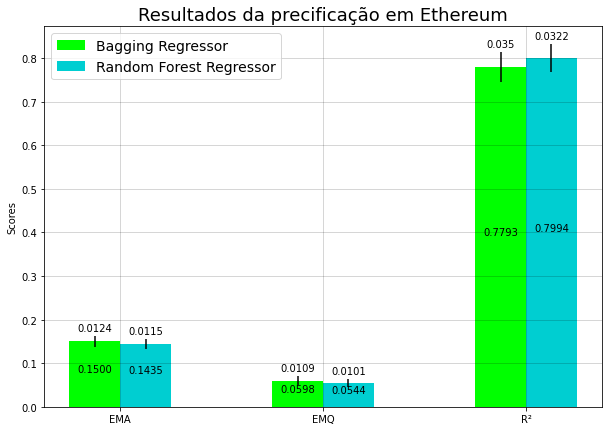

In [1]:

import matplotlib.pyplot as plt
import numpy as np


labels = ['EMA', 'EMQ', 'R²']
means_b = [0.1500, 0.0598, 0.7793]
means_r = [0.1435, 0.0544, 0.7994]
std_b = [0.0124, 0.0109, 0.0350]
std_r = [0.0115, 0.0101, 0.0322]



# STRUCTURE
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
plt.figure(figsize=(10,7))

# PLOTTING
rects_b = plt.bar(x - width/2, means_b, width, yerr=std_b, label='Bagging Regressor', color="lime")
rects_r = plt.bar(x + width/2, means_r, width, yerr=std_r, label='Random Forest Regressor', color="darkturquoise")

# DECORATING
plt.ylabel('Scores')
plt.title('Resultados da precificação em Ethereum', fontsize = 18)
plt.xticks(x, labels)
plt.legend(loc="upper left", fontsize = 14)
plt.grid(axis="both", color="black", alpha=0.2)

plt.bar_label(rects_b, fmt='%0.4f', padding=5, label_type='center')
plt.bar_label(rects_r, fmt='%0.4f', padding=5, label_type='center')

plt.bar_label(rects_b, labels=std_b, fmt='%0.4f', padding=3)
plt.bar_label(rects_r, labels=std_r, fmt='%0.4f', padding=3)

plt.savefig("CNMAC_1.jpg")
plt.show()

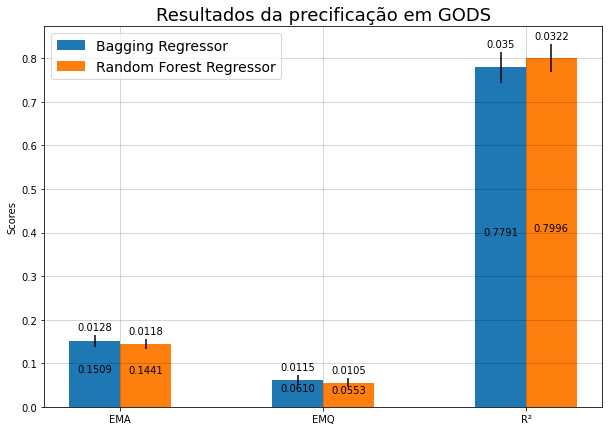

In [1]:

import matplotlib.pyplot as plt
import numpy as np


labels = ['EMA', 'EMQ', 'R²']
means_b = [0.1509, 0.0610, 0.7791]
means_r = [0.1441, 0.0553, 0.7996]
std_b = [0.0128, 0.0115, 0.0350]
std_r = [0.0118, 0.0105, 0.0322]



# STRUCTURE
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
plt.figure(figsize=(10,7))

# PLOTTING
rects_b = plt.bar(x - width/2, means_b, width, yerr=std_b, label='Bagging Regressor')
rects_r = plt.bar(x + width/2, means_r, width, yerr=std_r, label='Random Forest Regressor')

# DECORATING
plt.ylabel('Scores')
plt.title('Resultados da precificação em GODS', fontsize = 18)
plt.xticks(x, labels)
plt.legend(loc="upper left", fontsize = 14)
plt.grid(axis="both", color="black", alpha=0.2)

plt.bar_label(rects_b, fmt='%0.4f', padding=5, label_type='center')
plt.bar_label(rects_r, fmt='%0.4f', padding=5, label_type='center')

plt.bar_label(rects_b, labels=std_b, fmt='%0.4f', padding=3)
plt.bar_label(rects_r, labels=std_r, fmt='%0.4f', padding=3)

plt.savefig("CNMAC_2.jpg")
plt.show()

RESULTADOS


,Model,Kind,MAE,MSE,EVS,R2
5,Random Forest Regressor,Ensemble,0.112772,0.035314,0.812490,0.812489
241,Random Forest Regressor,Ensemble,0.114094,0.037343,0.789642,0.789466
81,Random Forest Regressor,Ensemble,0.114601,0.034804,0.807297,0.807289


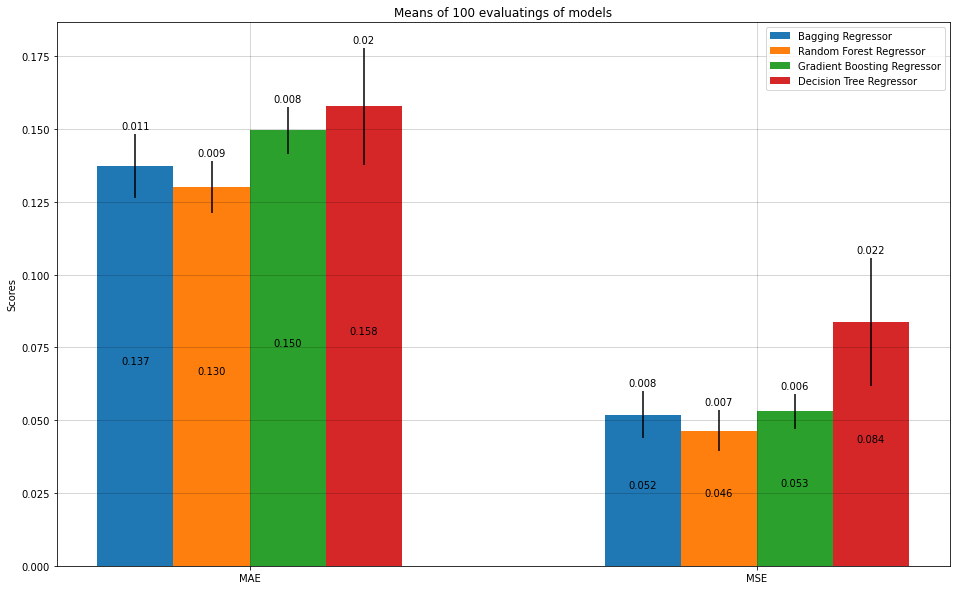

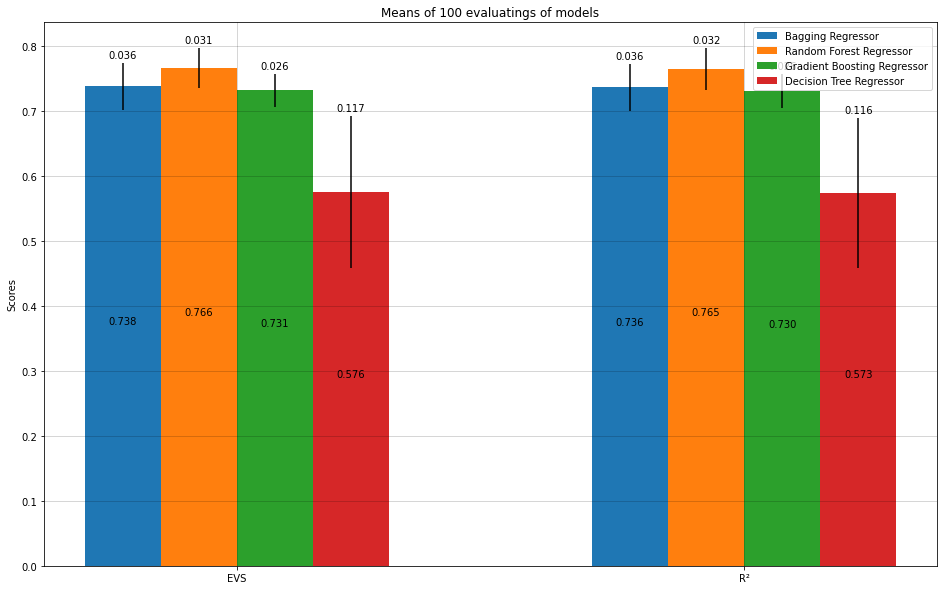

In [22]:
printando_resultados(data_set_ETH)

# Pricing cards in GODS: Using statistics informations

In [13]:
print("Preparação para precificação em GODS")
df_all_clean, y_ETH, y_GODS, df_categorical, df_int, df_float = pre_processing(df_all, 'GODS')
df_all_NLP = processing_text(df_all_clean)
print(f"Dados finais com tratamento natural de linguagem: {df_all_NLP.shape}")
display(df_all_NLP.head(1))

results = {
    "Model":[],
    "Kind":[],
    "MAE":[],
    "MSE":[],
    "EVS":[],
    "R2":[]
}
results = pd.DataFrame(results)

for i in range(100):
    model(df_all_NLP, y_GODS, seed=seed)
data_set_GODS = results

Preparação para precificação em GODS
Inicial:  (1227, 19)
Removendo outliers:  (1019, 19)
Dados categoricos:  (1019, 30)
Dados númericos:  (1019, 5)
Dados float:  (1019, 5)
Tudo junto, menos target:  (1019, 40)
Dados finais com tratamento natural de linguagem: (1019, 404)


,abil,acolyt,across,add,addit,aether,aetherbug,afterlif,aid,alreadi,also,amazon,among,amount,amplur,and,anim,anoth,anubian,appli,arachn,armor,artific,at,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,bearstrid,beast,becom,belong,beneath,bind,black,bladefli,bless,blitz,board,bodyguard,bomb,boost,bottom,broken,buff,burn,caller,can,cannot,cant,card,case,cast,chain,charact,choos,chosen,citi,closer,combin,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,dealt,death,debuff,decept,deck,delv,demon,destroy,die,differ,discard,distribut,divid,divin,dog,domain,dont,doubl,dragon,draw,drawn,durabl,echo,effect,either,empow,enchant,end,enemi,enemy,enter,equal,equip,escape,even,everi,exclud,expend,experiment,explos,extra,fan,fate,favor,fill,first,five,flank,follow,forese,four,frenzi,friend,friendly,frontlin,fruit,full,fulli,gain,gem,generous,get,give,given,go,god,godblitz,goe,guard,guardian,guild,half,hand,hasnt,haunt,head,heal,health,heirloom,hidden,hide,higher,highest,hold,hook,huscarl,hydra,hyena,impl,includ,increas,injur,injured,instead,it,jaguar,kill,last,least,leav,leech,legendari,less,lethenon,light,lock,look,lose,loses,lower,lowest,magic,malfunct,mana,manaborn,mani,match,maximum,may,milit,minus,miss,move,myst,mystic,natur,nether,netherbeast,netherspawn,new,next,nimbl,nondecept,none,nonneutr,nonvik,nonzombi,noxious,number,obliter,odd,of,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overkil,owl,owner,parthen,per,perform,pharaoh,pick,pillar,pixi,place,plant,play,player,point,power,prison,propyrean,protect,pull,put,raider,rais,random,randomis,rat,rave,reach,reaver,receiv,recruit,reduc,refresh,regen,rel,relic,remain,remov,repeat,replac,result,return,reveal,roar,rogu,round,rune,second,select,sentient,set,shadow,shard,shax,shimmerscal,shuffl,side,sinc,six,skelet,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,sprout,start,stat,static,steal,strength,strik,strike,strongest,structur,summon,surviv,survivor,swap,switch,take,target,tempt,text,thaeric,the,their,this,three,thunder,tie,time,to,top,total,transform,tree,trigger,turn,twice,twin,two,unchain,unless,unlock,unus,use,valid,valknir,valu,vanguard,vibrant,vik,vike,vile,void,walk,wall,war,ward,warrior,wast,weakest,weapon,whenev,wild,wisp,without,worth,would,wretch,xx,young,your,zombi,zone,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_genesis,set_mortal,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)","(Tendencia,)","(Vendidos por semana,)",In % of Decks,Deck win rate,Unique Deck WR,Variação do preço %,difference_%
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.273701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

RESULTADOS


,Model,Kind,MAE,MSE,EVS,R2
261,Random Forest Regressor,Ensemble,0.090732,0.024951,0.810002,0.805055
77,Random Forest Regressor,Ensemble,0.090766,0.025675,0.797655,0.796308
209,Random Forest Regressor,Ensemble,0.092512,0.024307,0.818929,0.818523


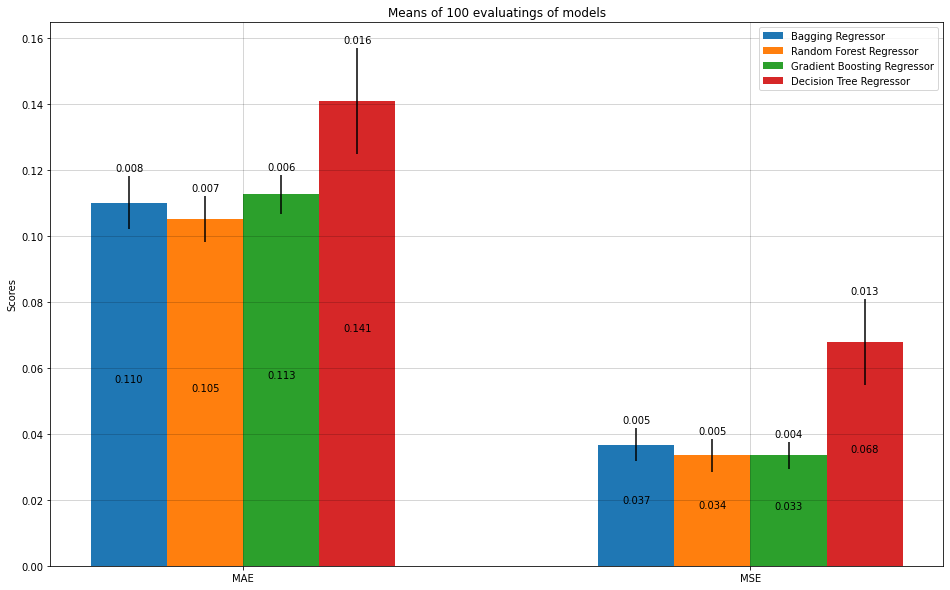

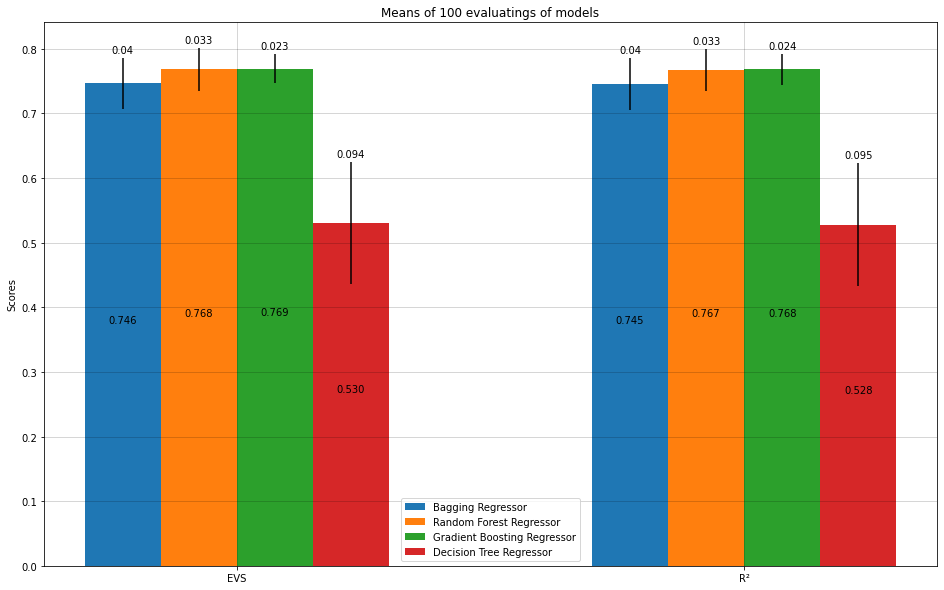

In [14]:
printando_resultados(data_set_GODS)

# Pricing cards in ETH: Without statistics informations

In [15]:
print("Preparação para precificação em ETH")
df_all_clean, y_ETH, y_GODS, df_categorical, df_int, df_float = pre_processing(df_new_cards, 'ETH')
df_all_NLP = processing_text(df_all_clean)
print(f"Dados finais com tratamento natural de linguagem: {df_all_NLP.shape}")
display(df_all_NLP.head(1))

results = {
    "Model":[],
    "Kind":[],
    "MAE":[],
    "MSE":[],
    "EVS":[],
    "R2":[]
}
results = pd.DataFrame(results)

for i in range(100):
    model(df_all_NLP, y_ETH, seed=seed)
data_set_ETH_2 = results

Preparação para precificação em ETH
Inicial:  (1227, 13)
Removendo outliers:  (1016, 13)
Dados categoricos:  (1016, 30)
Dados númericos:  (1016, 3)
Dados float:  (1016, 1)
Tudo junto, menos target:  (1016, 34)
Dados finais com tratamento natural de linguagem: (1016, 398)


,abil,acolyt,across,add,addit,aether,aetherbug,afterlif,aid,alreadi,also,amazon,among,amount,amplur,and,anim,anoth,anubian,appli,arachn,armor,artific,at,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,bearstrid,beast,becom,belong,beneath,bind,black,bladefli,bless,blitz,board,bodyguard,bomb,boost,bottom,broken,buff,burn,caller,can,cannot,cant,card,case,cast,chain,charact,choos,chosen,citi,closer,combin,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,dealt,death,debuff,decept,deck,delv,demon,destroy,die,differ,discard,distribut,divid,divin,dog,domain,dont,doubl,dragon,draw,drawn,durabl,echo,effect,either,empow,enchant,end,enemi,enemy,enter,equal,equip,escape,even,everi,exclud,expend,experiment,explos,extra,fan,fate,favor,fill,first,five,flank,follow,forese,four,frenzi,friend,friendly,frontlin,fruit,full,fulli,gain,gem,generous,get,give,given,go,god,godblitz,goe,guard,guardian,guild,half,hand,hasnt,haunt,head,heal,health,heirloom,hidden,hide,higher,highest,hold,hook,huscarl,hydra,hyena,impl,includ,increas,injur,injured,instead,it,jaguar,kill,last,least,leav,leech,legendari,less,lethenon,light,lock,look,lose,loses,lower,lowest,magic,malfunct,mana,manaborn,mani,match,maximum,may,milit,minus,miss,move,myst,mystic,natur,nether,netherbeast,netherspawn,new,next,nimbl,nondecept,none,nonneutr,nonvik,nonzombi,noxious,number,obliter,odd,of,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overkil,owl,owner,parthen,per,perform,pharaoh,pick,pillar,pixi,place,plant,play,player,point,power,prison,propyrean,protect,pull,put,raider,rais,random,randomis,rat,rave,reach,reaver,receiv,recruit,reduc,refresh,regen,rel,relic,remain,remov,repeat,replac,result,return,reveal,roar,rogu,round,rune,second,select,sentient,set,shadow,shard,shax,shimmerscal,shuffl,side,sinc,six,skelet,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,sprout,start,stat,static,steal,strength,strik,strike,strongest,structur,summon,surviv,survivor,swap,switch,take,target,tempt,text,thaeric,the,their,this,three,thunder,tie,time,to,top,total,transform,tree,trigger,turn,twice,twin,two,unchain,unless,unlock,unus,use,valid,valknir,valu,vanguard,vibrant,vik,vike,vile,void,walk,wall,war,ward,warrior,wast,weakest,weapon,whenev,wild,wisp,without,worth,would,wretch,xx,young,your,zombi,zone,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_genesis,set_mortal,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)",difference_%
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.273978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

RESULTADOS


,Model,Kind,MAE,MSE,EVS,R2
321,Random Forest Regressor,Ensemble,0.092505,0.024087,0.774885,0.774170
17,Random Forest Regressor,Ensemble,0.098728,0.027502,0.777930,0.776526
261,Random Forest Regressor,Ensemble,0.099267,0.024241,0.813460,0.813414


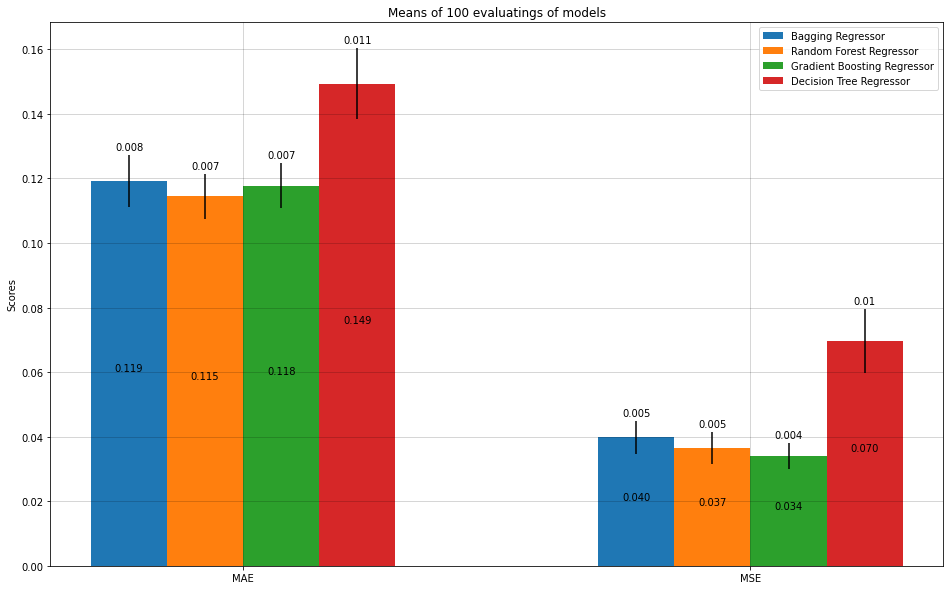

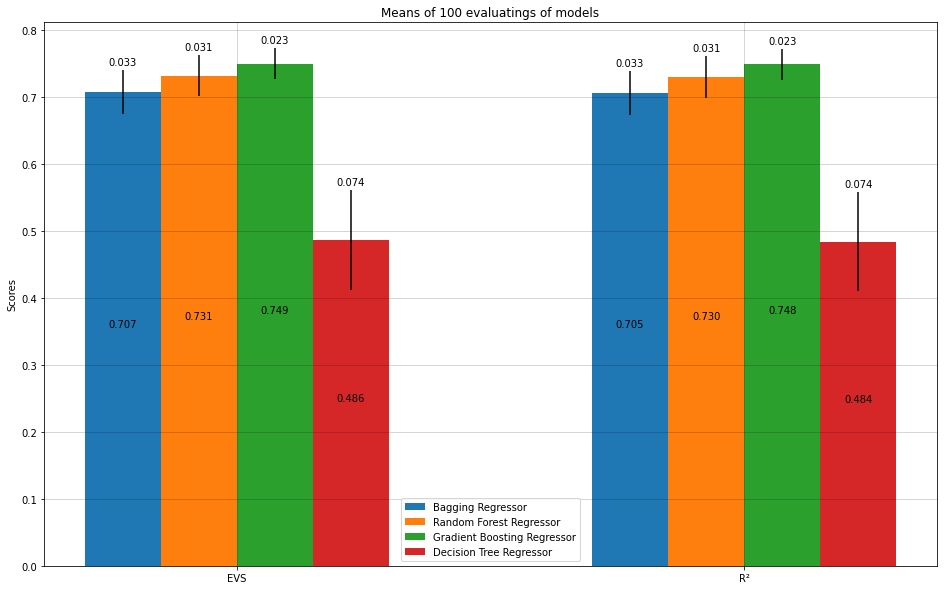

In [16]:
printando_resultados(data_set_ETH_2)

# Pricing cards in GODS: Without statistics informations

In [17]:
print("Preparação para precificação em GODS")
df_all_clean, y_ETH, y_GODS, df_categorical, df_int, df_float = pre_processing(df_new_cards, 'GODS')
df_all_NLP = processing_text(df_all_clean)
print(f"Dados finais com tratamento natural de linguagem: {df_all_NLP.shape}")
display(df_all_NLP.head(1))

results = {
    "Model":[],
    "Kind":[],
    "MAE":[],
    "MSE":[],
    "EVS":[],
    "R2":[]
}
results = pd.DataFrame(results)

for i in range(100):
    model(df_all_NLP, y_GODS, seed=seed)
data_set_GODS_2 = results

Preparação para precificação em GODS
Inicial:  (1227, 13)
Removendo outliers:  (1019, 13)
Dados categoricos:  (1019, 30)
Dados númericos:  (1019, 3)
Dados float:  (1019, 1)
Tudo junto, menos target:  (1019, 34)
Dados finais com tratamento natural de linguagem: (1019, 398)


,abil,acolyt,across,add,addit,aether,aetherbug,afterlif,aid,alreadi,also,amazon,among,amount,amplur,and,anim,anoth,anubian,appli,arachn,armor,artific,at,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,bearstrid,beast,becom,belong,beneath,bind,black,bladefli,bless,blitz,board,bodyguard,bomb,boost,bottom,broken,buff,burn,caller,can,cannot,cant,card,case,cast,chain,charact,choos,chosen,citi,closer,combin,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,dealt,death,debuff,decept,deck,delv,demon,destroy,die,differ,discard,distribut,divid,divin,dog,domain,dont,doubl,dragon,draw,drawn,durabl,echo,effect,either,empow,enchant,end,enemi,enemy,enter,equal,equip,escape,even,everi,exclud,expend,experiment,explos,extra,fan,fate,favor,fill,first,five,flank,follow,forese,four,frenzi,friend,friendly,frontlin,fruit,full,fulli,gain,gem,generous,get,give,given,go,god,godblitz,goe,guard,guardian,guild,half,hand,hasnt,haunt,head,heal,health,heirloom,hidden,hide,higher,highest,hold,hook,huscarl,hydra,hyena,impl,includ,increas,injur,injured,instead,it,jaguar,kill,last,least,leav,leech,legendari,less,lethenon,light,lock,look,lose,loses,lower,lowest,magic,malfunct,mana,manaborn,mani,match,maximum,may,milit,minus,miss,move,myst,mystic,natur,nether,netherbeast,netherspawn,new,next,nimbl,nondecept,none,nonneutr,nonvik,nonzombi,noxious,number,obliter,odd,of,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overkil,owl,owner,parthen,per,perform,pharaoh,pick,pillar,pixi,place,plant,play,player,point,power,prison,propyrean,protect,pull,put,raider,rais,random,randomis,rat,rave,reach,reaver,receiv,recruit,reduc,refresh,regen,rel,relic,remain,remov,repeat,replac,result,return,reveal,roar,rogu,round,rune,second,select,sentient,set,shadow,shard,shax,shimmerscal,shuffl,side,sinc,six,skelet,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,sprout,start,stat,static,steal,strength,strik,strike,strongest,structur,summon,surviv,survivor,swap,switch,take,target,tempt,text,thaeric,the,their,this,three,thunder,tie,time,to,top,total,transform,tree,trigger,turn,twice,twin,two,unchain,unless,unlock,unus,use,valid,valknir,valu,vanguard,vibrant,vik,vike,vile,void,walk,wall,war,ward,warrior,wast,weakest,weapon,whenev,wild,wisp,without,worth,would,wretch,xx,young,your,zombi,zone,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_genesis,set_mortal,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)",difference_%
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.273701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

RESULTADOS


,Model,Kind,MAE,MSE,EVS,R2
37,Random Forest Regressor,Ensemble,0.098977,0.028460,0.792531,0.791762
141,Random Forest Regressor,Ensemble,0.099999,0.025165,0.797653,0.793080
9,Random Forest Regressor,Ensemble,0.101806,0.029264,0.741710,0.739559


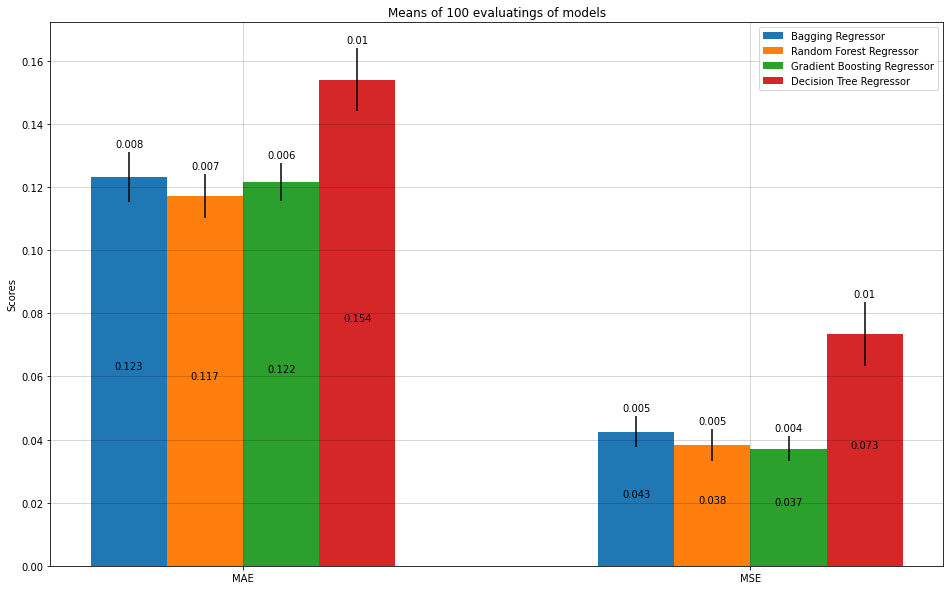

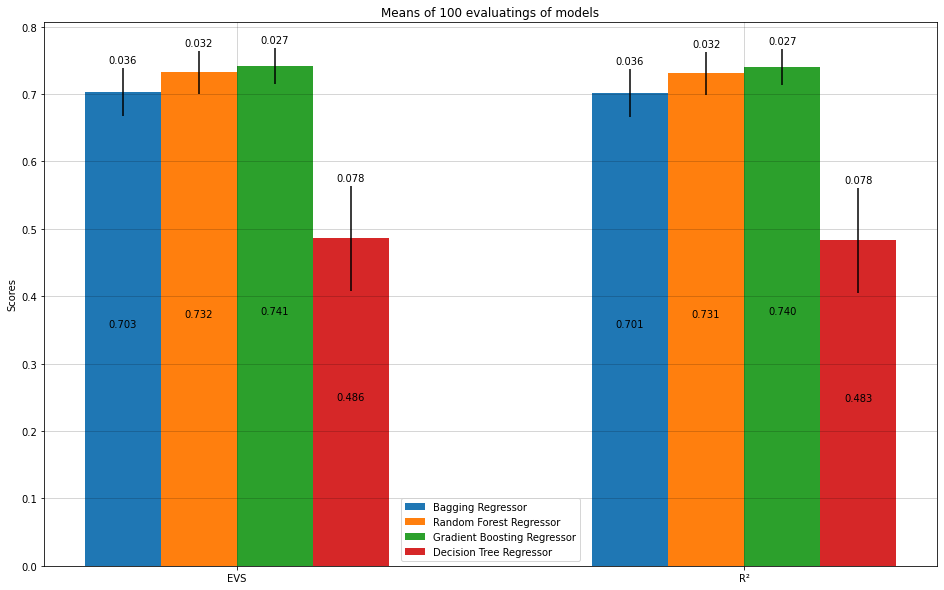

In [18]:
printando_resultados(data_set_GODS_2)

# Features selections for "Random forest regressor"

In [50]:
# For this problem we wil represent a solution of problem as a binary list [ 0 1 0 1 1 0 0 ... ]



def selecting(df_all_NLP, y_ETH, seed=None):
    X_train, X_test, y_train, y_test = train_test_split(df_all_NLP, y_ETH, test_size=0.33, random_state=seed)
    return X_train, X_test, y_train, y_test
    
def fitness_function(solution, MODEL, X, y, seed=None):
    
    if sum(solution) == 0:
        return 0,
    else:
        
        Indices = [i for i, n in enumerate(solution) if n == 0]
        currentX = X.drop(columns=X.columns[Indices])
    
        X_train, X_test, y_train, y_test = selecting(currentX, y, seed)
        MODEL.fit(X_train.values, y_train.values.ravel())
        y_pred = MODEL.predict(X_test.values)
        return mean_absolute_error(y_test, y_pred) + sum(solution)*0.0001,


In [28]:
print("Preparação para precificação em ETH")
df_all_clean, y_ETH, y_GODS, df_categorical, df_int, df_float = pre_processing(df_all, 'ETH')
df_all_NLP = processing_text(df_all_clean)
print(f"Dados finais com tratamento natural de linguagem: {df_all_NLP.shape}")
#display(df_all_NLP.head(1))

Preparação para precificação em ETH
Inicial:  (1227, 19)
Removendo outliers:  (1016, 19)
Dados categoricos:  (1016, 30)
Dados númericos:  (1016, 5)
Dados float:  (1016, 5)
Tudo junto, menos target:  (1016, 40)
Dados finais com tratamento natural de linguagem: (1016, 404)


In [40]:
# CONTROL PANEL
SEED = 42
random.seed(SEED)
NUM_FEATURES = len(df_all_NLP.columns)
MODEL = RandomForestRegressor(random_state=SEED)
df_genetic = df_all_NLP; df_genetic.columns = [i for i in range(1,NUM_FEATURES+1)]
df_genetic.head(1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.273978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.75528,-0.973415,-1.048733,-1.911235,-0.36127,0.021,0.529,0.529,-0.017205,0.035163


C:\Users\Isaac\AppData\Local\Temp\ipykernel_128040\2848813777.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


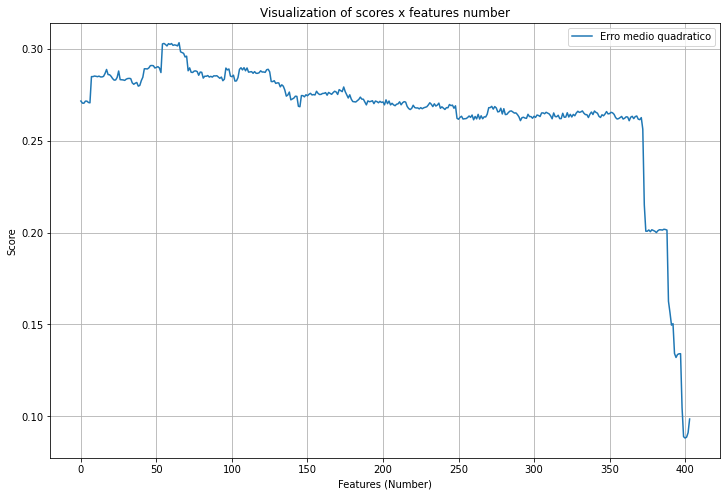

In [48]:
# Here we will teste how the model behaves changing the features number
import matplotlib.pyplot as plt


# CALCULATING
fitness = []
for i in range(NUM_FEATURES):
    solution = [1]*(i+1) + [0]*(NUM_FEATURES-(i+1))
    fitness.append(fitness_function(solution, MODEL, df_test, y_ETH, seed=SEED))
    #print(f"Primeiras {i+1} features(recursos): score = {fitness[i]}")


# PLOTTING
plt.figure(figsize=(12,8))
plt.plot([i for i in range(NUM_FEATURES)], fitness, label="Erro medio absoluto")


# ENHANCING
plt.xlabel(xlabel="Features (Number)")
plt.ylabel(ylabel="Score")
plt.title("Visualization of scores x features number")
plt.legend()

plt.grid(b=True)
plt.show()

<h1> Selecting Features

In [ ]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [ ]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = NUM_FEATURES # Number of features to be selected
def geneBin():
    return random.randint(0,1)
toolbox.register("Gene", geneBin)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
toolbox.register("Individual", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS 
toolbox.register("evaluate", fitness_function, MODEL=MODEL, X=df_genetic, y=y_ETH, seed=SEED)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=2/CHROMOSOME_LENGTH)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(5)


# CONTROL PANEL
POPULATION_SIZE = 50
PROBABILITY_CROSSOVER = 0.8
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 20 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = eaSimpleWithElitism(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)